# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
mnames = ["movie_id", "title", "genres"]
movies = pd.read_table("movies.dat", sep="::",
                       header=None, names=mnames, engine="python")
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# Task 1: Display first 10 rows

In [3]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
# subsetting [first element index : last element index]
# default index starts at zero

In [5]:
movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


# Task 2: Display last 10 rows

In [6]:
movies.tail(10)

,movie_id,title,genres
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [7]:
# subsetting by negative indexing
# last index is -1 and so tenth last index would be -10
# by default last index is the last element 

In [8]:
movies[-10:]

,movie_id,title,genres
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama
3875,3945,Digimon: The Movie (2000),Adventure|Animation|Children's
3876,3946,Get Carter (2000),Action|Drama|Thriller
3877,3947,Get Carter (1971),Thriller
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


# Task 3: Show dimensions of the data

In [9]:
movies.shape

(3883, 3)

# Task 4: Check for missing values

In [10]:
movies.isnull()

,movie_id,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
3878,False,False,False
3879,False,False,False
3880,False,False,False
3881,False,False,False


In [11]:
# column wise operation

In [12]:
movies.isnull().sum()

movie_id    0
title       0
genres      0
dtype: int64

# Advanced pre-processing

In [13]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [14]:
movies["genres"] = movies["genres"].apply(lambda x: list(x.split("|")))
movies

,movie_id,title,genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]"
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy]
3879,3949,Requiem for a Dream (2000),[Drama]
3880,3950,Tigerland (2000),[Drama]
3881,3951,Two Family House (2000),[Drama]


In [15]:
movies["unique_genres"] = movies["genres"].apply(lambda x: len(x))
movies

,movie_id,title,genres,unique_genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",3
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",3
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",2
4,5,Father of the Bride Part II (1995),[Comedy],1
...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],1
3879,3949,Requiem for a Dream (2000),[Drama],1
3880,3950,Tigerland (2000),[Drama],1
3881,3951,Two Family House (2000),[Drama],1


In [16]:
movies["unique_genres"] = movies["unique_genres"].astype('category')
movies

,movie_id,title,genres,unique_genres
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",3
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",3
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",2
4,5,Father of the Bride Part II (1995),[Comedy],1
...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],1
3879,3949,Requiem for a Dream (2000),[Drama],1
3880,3950,Tigerland (2000),[Drama],1
3881,3951,Two Family House (2000),[Drama],1


In [17]:
movies["year"] = movies["title"].apply(
    lambda x: int(re.findall('([1-2][09][0-9][0-9])',x)[0]))
movies

,movie_id,title,genres,unique_genres,year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",3,1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",3,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",2,1995
4,5,Father of the Bride Part II (1995),[Comedy],1,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],1,2000
3879,3949,Requiem for a Dream (2000),[Drama],1,2000
3880,3950,Tigerland (2000),[Drama],1,2000
3881,3951,Two Family House (2000),[Drama],1,2000


# INTERMEDIATE

# Task 1: Unique years

In [19]:
movies

,movie_id,title,genres,unique_genres,year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",3,1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",3,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",2,1995
4,5,Father of the Bride Part II (1995),[Comedy],1,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],1,2000
3879,3949,Requiem for a Dream (2000),[Drama],1,2000
3880,3950,Tigerland (2000),[Drama],1,2000
3881,3951,Two Family House (2000),[Drama],1,2000


In [44]:
sorted(movies["year"].unique())[:10] # Fist 10 rows to avoid clutter

[1900, 1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928]

In [21]:
len(movies["year"].unique())

84

# Task 2: Number of shows each year

In [22]:
movies_sorted_by_year = pd.DataFrame(movies.sort_values(by=["year"]))
movies_sorted_by_year

,movie_id,title,genres,unique_genres,year
2622,2691,"Legend of 1900, The (Leggenda del pianista sul...",[Drama],1,1900
2752,2821,Male and Female (1919),"[Adventure, Drama]",2,1919
2754,2823,"Spiders, The (Die Spinnen, 1. Teil: Der Golden...","[Action, Drama]",2,1919
3063,3132,Daddy Long Legs (1919),[Comedy],1,1919
3240,3309,"Dog's Life, A (1920)",[Comedy],1,1920
...,...,...,...,...,...
3247,3316,Reindeer Games (2000),"[Action, Thriller]",2,2000
3232,3301,"Whole Nine Yards, The (2000)","[Comedy, Crime]",2,2000
3882,3952,"Contender, The (2000)","[Drama, Thriller]",2,2000
912,924,2001: A Space Odyssey (1968),"[Drama, Mystery, Sci-Fi, Thriller]",4,2001


In [23]:
movies_sorted_by_year["year"].value_counts(sort=False)

1900      1
1919      3
1920      2
1921      1
1922      2
       ... 
1998    335
1999    281
2000    160
2001      1
2010      1
Name: year, Length: 84, dtype: int64

# Task 3: Unique Language/Genre

In [24]:
movies.genres

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

In [25]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x)
genres = pd.unique(all_genres)
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

# Task 4: How many languages/genres by year

In [26]:
movies

,movie_id,title,genres,unique_genres,year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",3,1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",3,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",2,1995
4,5,Father of the Bride Part II (1995),[Comedy],1,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],1,2000
3879,3949,Requiem for a Dream (2000),[Drama],1,2000
3880,3950,Tigerland (2000),[Drama],1,2000
3881,3951,Two Family House (2000),[Drama],1,2000


In [27]:
movie_genre_by_year = pd.DataFrame(
    movies["genres"].groupby(movies["year"]).sum()).reset_index()
movie_genre_by_year

,year,genres
0,1900,[Drama]
1,1919,"[Adventure, Drama, Action, Drama, Comedy]"
2,1920,"[Comedy, Comedy]"
3,1921,[Action]
4,1922,"[Horror, Drama]"
...,...,...
79,1998,"[Drama, Crime, Drama, Thriller, Horror, Drama,..."
80,1999,"[Drama, War, Comedy, Drama, Thriller, Comedy, ..."
81,2000,"[Action, Comedy, Musical, Animation, Children'..."
82,2001,"[Drama, Mystery, Sci-Fi, Thriller]"


In [28]:
movie_genre_by_year["genres"] = movie_genre_by_year["genres"].apply(
    lambda x: set(x))
movie_genre_by_year

,year,genres
0,1900,{Drama}
1,1919,"{Action, Drama, Comedy, Adventure}"
2,1920,{Comedy}
3,1921,{Action}
4,1922,"{Drama, Horror}"
...,...,...
79,1998,"{Drama, Horror, Crime, Romance, Action, Sci-Fi..."
80,1999,"{Drama, Horror, Sci-Fi, War, Romance, Action, ..."
81,2000,"{Drama, Sci-Fi, Romance, Action, Animation, Ho..."
82,2001,"{Drama, Mystery, Thriller, Sci-Fi}"


# Task 5: Draw count plot

In [29]:
movies.dtypes

movie_id            int64
title              object
genres             object
unique_genres    category
year                int64
dtype: object

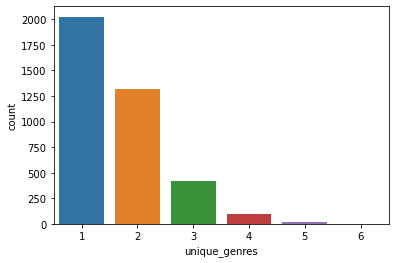

In [30]:
sns.countplot(x="unique_genres", data=movies)
plt.show()

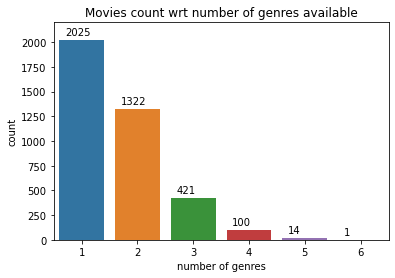

In [31]:
plt.figure()
ax = sns.countplot(
    x="unique_genres",
    data=movies)

plt.ylim(0,2200)
plt.xlabel("number of genres")
plt.title("Movies count wrt number of genres available")

for p in ax.patches:
    ax.annotate(
        p.get_height(), (p.get_x()+0.1, p.get_height()+50))
plt.show()

# ADVANCED

In [32]:
movies

,movie_id,title,genres,unique_genres,year
0,1,Toy Story (1995),"[Animation, Children's, Comedy]",3,1995
1,2,Jumanji (1995),"[Adventure, Children's, Fantasy]",3,1995
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",2,1995
3,4,Waiting to Exhale (1995),"[Comedy, Drama]",2,1995
4,5,Father of the Bride Part II (1995),[Comedy],1,1995
...,...,...,...,...,...
3878,3948,Meet the Parents (2000),[Comedy],1,2000
3879,3949,Requiem for a Dream (2000),[Drama],1,2000
3880,3950,Tigerland (2000),[Drama],1,2000
3881,3951,Two Family House (2000),[Drama],1,2000


# Task 1: Draw pie chart for distribution of genres

In [33]:
movie_genre_by_year

,year,genres
0,1900,{Drama}
1,1919,"{Action, Drama, Comedy, Adventure}"
2,1920,{Comedy}
3,1921,{Action}
4,1922,"{Drama, Horror}"
...,...,...
79,1998,"{Drama, Horror, Crime, Romance, Action, Sci-Fi..."
80,1999,"{Drama, Horror, Sci-Fi, War, Romance, Action, ..."
81,2000,"{Drama, Sci-Fi, Romance, Action, Animation, Ho..."
82,2001,"{Drama, Mystery, Thriller, Sci-Fi}"


In [34]:
movie_genre_by_year["genres"]

0                                               {Drama}
1                    {Action, Drama, Comedy, Adventure}
2                                              {Comedy}
3                                              {Action}
4                                       {Drama, Horror}
                            ...                        
79    {Drama, Horror, Crime, Romance, Action, Sci-Fi...
80    {Drama, Horror, Sci-Fi, War, Romance, Action, ...
81    {Drama, Sci-Fi, Romance, Action, Animation, Ho...
82                   {Drama, Mystery, Thriller, Sci-Fi}
83                                    {Mystery, Sci-Fi}
Name: genres, Length: 84, dtype: object

In [45]:
genre_list = []
for i in movie_genre_by_year["genres"]:
    genre_list.extend(i)
genre_list[:10] # First 10 rows to avoid clutter

['Drama',
 'Action',
 'Drama',
 'Comedy',
 'Adventure',
 'Comedy',
 'Action',
 'Drama',
 'Horror',
 'Drama']

In [36]:
new_dict = dict()
counter = 0
for i in genre_list:
    new_dict[i] = new_dict.get(i,0) + 1
new_dict

{'Drama': 79,
 'Action': 52,
 'Comedy': 74,
 'Adventure': 55,
 'Horror': 59,
 'War': 53,
 'Sci-Fi': 53,
 'Crime': 47,
 'Thriller': 69,
 'Romance': 57,
 'Musical': 58,
 'Mystery': 42,
 'Documentary': 22,
 'Western': 39,
 'Film-Noir': 25,
 'Animation': 40,
 "Children's": 57,
 'Fantasy': 28}

In [37]:
pie_frame = pd.Series(new_dict, index=new_dict.keys())
pie_frame

Drama          79
Action         52
Comedy         74
Adventure      55
Horror         59
War            53
Sci-Fi         53
Crime          47
Thriller       69
Romance        57
Musical        58
Mystery        42
Documentary    22
Western        39
Film-Noir      25
Animation      40
Children's     57
Fantasy        28
dtype: int64

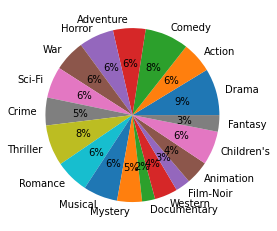

In [38]:
plt.pie(
    pie_frame, labels=new_dict.keys(), 
    autopct="%.0f%%")
plt.show()

In [39]:
len(pie_frame)

18

In [40]:
explode_range = list(np.zeros(shape=(17,)))
explode_range.append(0.2)
explode_range

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.2]

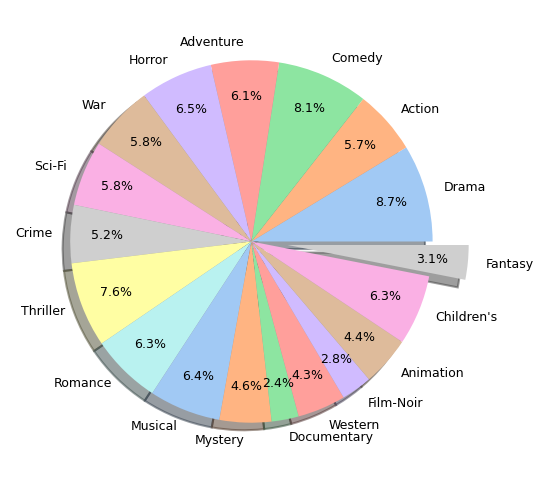

In [41]:
plt.figure(figsize=(4, 4), dpi=150)
plt.pie(pie_frame,
        labels=new_dict.keys(),
        textprops={"fontsize":6},
        autopct="%.1f%%",
        pctdistance=0.8,
        explode=explode_range,
        shadow=True,
        colors=sns.color_palette("pastel"))
plt.show()

# Happy Coding